32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


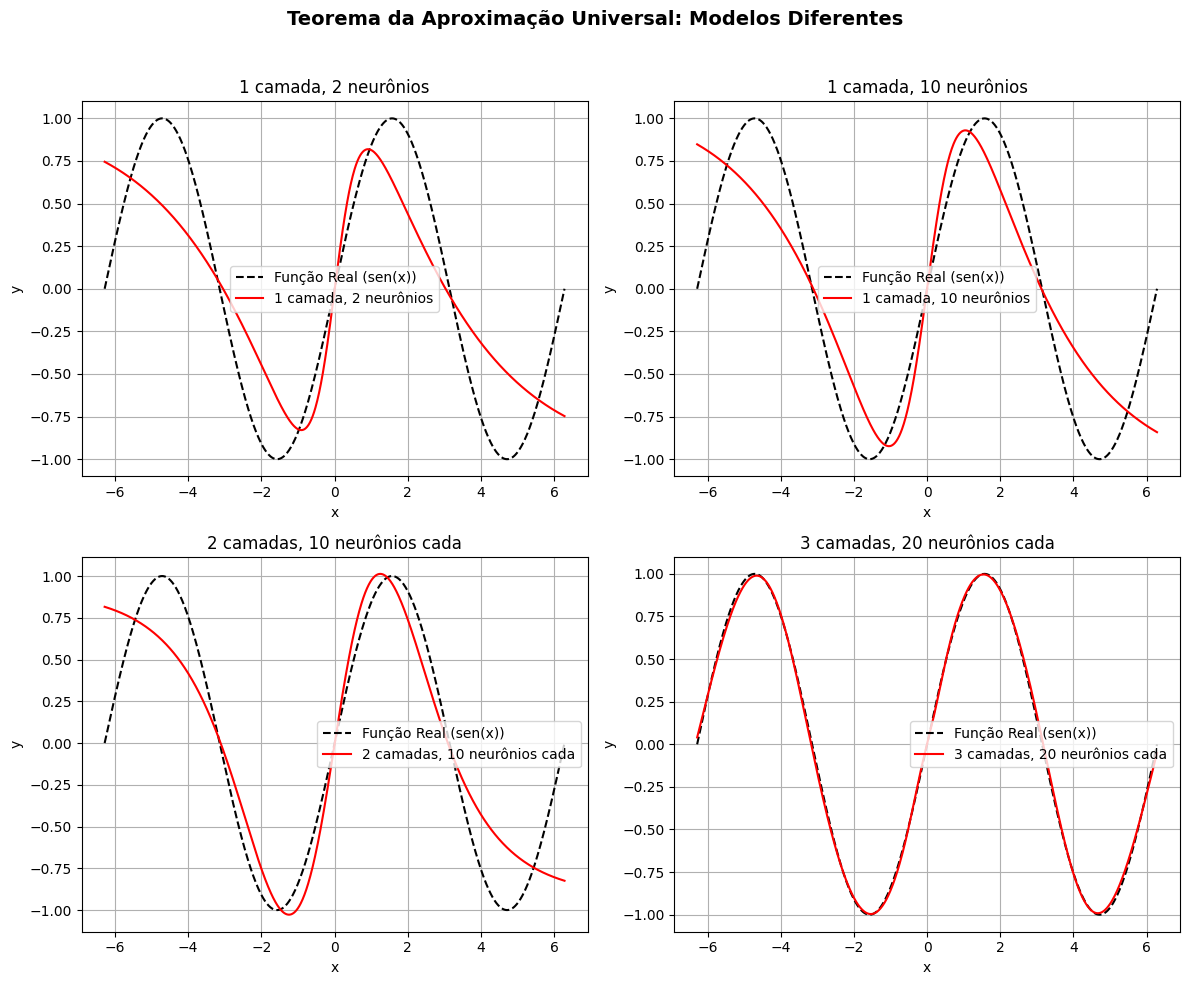

In [3]:
# Recarregar as bibliotecas após o reset do estado
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Gerar dados para uma função contínua (exemplo: seno)
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
y = np.sin(x)  # Função alvo

# Criar modelos de redes neurais com diferentes quantidades de neurônios
models = {
    "1 camada, 2 neurônios": Sequential([
        Dense(2, activation='tanh', input_shape=(1,)),
        Dense(1)
    ]),
    "1 camada, 10 neurônios": Sequential([
        Dense(10, activation='tanh', input_shape=(1,)),
        Dense(1)
    ]),
    "2 camadas, 10 neurônios cada": Sequential([
        Dense(10, activation='tanh', input_shape=(1,)),
        Dense(10, activation='tanh'),
        Dense(1)
    ]),
    "3 camadas, 20 neurônios cada": Sequential([
        Dense(20, activation='tanh', input_shape=(1,)),
        Dense(20, activation='tanh'),
        Dense(20, activation='tanh'),
        Dense(1)
    ])
}

# Compilar e treinar os modelos
x_train = x.reshape(-1, 1)
y_train = y.reshape(-1, 1)

for name, model in models.items():
    model.compile(optimizer='adam', loss='mse')
    model.fit(x_train, y_train, epochs=100, verbose=0)  # Treinamento silencioso

# Gerar previsões para comparação
x_test = np.linspace(-2 * np.pi, 2 * np.pi, 1000).reshape(-1, 1)
y_true = np.sin(x_test)

predictions = {name: model.predict(x_test) for name, model in models.items()}

# Criar os gráficos
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Teorema da Aproximação Universal: Modelos Diferentes", fontsize=14, fontweight='bold')

for ax, (name, y_pred) in zip(axes.flatten(), predictions.items()):
    ax.plot(x_test, y_true, label="Função Real (sen(x))", color='black', linestyle='dashed')
    ax.plot(x_test, y_pred, label=name, color='red')
    ax.set_title(name, fontsize=12)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend()
    ax.grid()

# Exibir os gráficos
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()